In [1]:
#Creating a Multiarmed Bandit Problem

In [2]:
import torch

# STEP 1: Creating the Multi Armed Bandit Problem

In [31]:
class BanditEnv():
    def __init__(self,payout_list, reward_list):
    #1.A Payout_list is a list of PROBABILITIES that one of the bandits is going to pay (Slot Machines)    
        self.payout_list=payout_list
    #2.Reward_list is a list of REWARDS that each Bandit pays    
        self.reward_list=reward_list
    #3.Method that pulls the lever in either one of the machines    
    def step(self,action):
    #4.I create a random number between 0-1 and check if it is smaller that the action tha the action payout probability    
        if torch.rand(1).item() < self.payout_list[action]:
            return self.reward_list[action]
        return -1

In [32]:
bandit_payout=[0.1,0.15,0.3]
bandit_reward=[4,3,1]
bandit_env=BanditEnv(bandit_payout,bandit_reward)

# Solving Bandit Problem with Random Search


In [33]:
#1.Defining the number of episodes
n_episode=100000
#2.The number of action is simply 3, I can pull a lever in each of the 3 slot machines
n_action=len(bandit_payout)
#3.Creates this list [0, 0, 0]
action_count=[0 for _ in range(n_action)]
#4.Creates another list 0, 0, 0]
action_total_reward=[0 for _ in range(n_action)]
#5.Creates a lists of lists for all posible action[[], [], []]
action_avg_reward=[[] for _ in range(n_action)]

#6.We define a randome policy taking numbers out of a multinomial
def random_policy():
#7.torch.ones(n_action) creates a tensor [1,1,1] selects an between 0 and 2
    action=torch.multinomial(torch.ones(n_action),1).item()
    return action



In [34]:
for episode in range(n_episode):
    action=random_policy()
    reward=bandit_env.step(action)
    #1. I keeo track of the number I have pulled a lever in a machine
    action_count[action]+=1
    #2. Acumulated reward by action taken
    action_total_reward[action]+=reward
    #3. Calculating the avg return for every single one of the levers
    for a in range(n_action):
        if action_count[a]:
            action_avg_reward[a].append(action_total_reward[a]/action_count[a])
        else:
            action_avg_reward[a].append(0)

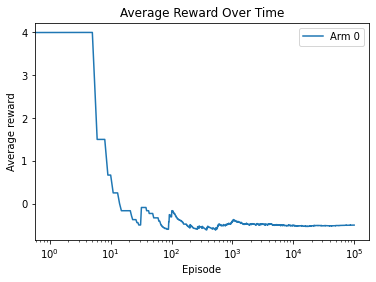

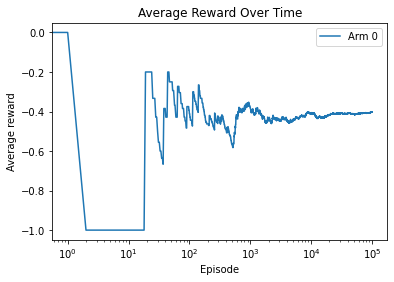

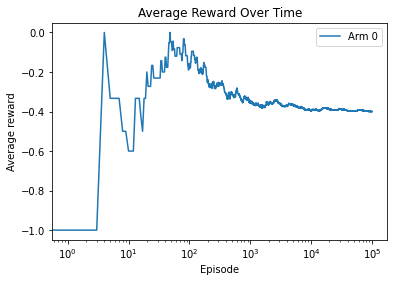

In [48]:
import matplotlib.pyplot as plt
for action in range(n_action):
    plt.plot(action_avg_reward[action])
    plt.legend(['Arm {}'.format(action) for action in range(n_action)])
    plt.title('Average Reward Over Time')
    plt.xscale('log')
    plt.xlabel('Episode')
    plt.ylabel('Average reward')
    plt.show()


Text(0, 0.5, 'Average reward')

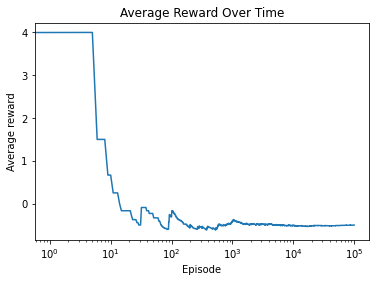

In [46]:
plt.plot(action_avg_reward[0])
plt.title('Average Reward Over Time')
plt.xscale('log')
plt.xlabel('Episode')
plt.ylabel('Average reward')
       

In [41]:
action_avg_reward[0]

[0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 1.5,
 1.5,
 1.5,
 0.6666666666666666,
 0.6666666666666666,
 0.25,
 0.25,
 0.25,
 0.0,
 -0.16666666666666666,
 -0.16666666666666666,
 -0.16666666666666666,
 -0.16666666666666666,
 -0.16666666666666666,
 -0.16666666666666666,
 -0.16666666666666666,
 -0.2857142857142857,
 -0.375,
 -0.375,
 -0.375,
 -0.375,
 -0.4444444444444444,
 -0.4444444444444444,
 -0.5,
 -0.5,
 -0.5,
 -0.09090909090909091,
 -0.09090909090909091,
 -0.09090909090909091,
 -0.09090909090909091,
 -0.09090909090909091,
 -0.09090909090909091,
 -0.09090909090909091,
 -0.16666666666666666,
 -0.16666666666666666,
 -0.16666666666666666,
 -0.16666666666666666,
 -0.23076923076923078,
 -0.23076923076923078,
 -0.23076923076923078,
 -0.23076923076923078,
 -0.23076923076923078,
 -0.23076923076923078,
 -0.23076923076923078,
 -0.2857142857142857,
 -0.3333333333333333,
 -0.3333333333333333,
 -0.3333333333333333,
 -0.3333333333333333,
 -0.3333333333333333,
 -0.3333333333333333,
 -0.3333333333333333,
 -0.3